In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# np.random.seed(46)

In [101]:
#calcule des gain  et des cout 

PRIX_LOTO = 2.20
PRIX_EUROMILLION = 2.30
NB_TIRAGE_LOTO_A = 156
NB_TIRAGE_EUROMILLION_A = 104

if_gain_loto = {
    "0,0":0,
    "1,0":0,
    "1,1": 2.20,
    "0,1": 2.20,
    "2,0": 4.50,
    "2,1": 11.10,
    "3,0": 18.60,
    "3,1": 50,
    "4,0": 335,
    "4,1": 817,
    "5,0": 68000,
    "5,1": 1000000
}
if_gain_euro_million = {
    "0,0":0,
    "1,0":0,
    "1,1":2.30,
    "0,1": 2.30,
    "2,0": 4.50,
    "2,1": 6.20,
    "3,0": 11.20,
    "3,1": 13.40,
    "2,2": 14.10,
    "4,0": 49.80,
    "3,2": 65.60,
    "4,1": 152.2,
    "4,2": 1773.40,
    "5,0": 23809,
    "5,1": 560301,
    "5,2": 10000000
}

def tirage_loto(numero_tirer=5,etoile_tirer=1) ->dict[str : tuple]:
    numero = np.arange(1,50)
    etoile = np.arange(1,10)
    numero = np.random.choice(numero,5,False)
    etoile = np.random.choice(etoile,1,False)    
    tirage = {"numero" : set(numero),
              "etoile" : set(etoile)}
    return tirage

def Calcule_gain_loto(numero_joueur,tirage) -> float:
    nb_numero_gagniant = len(numero_joueur["numero"].intersection((tirage["numero"])))  
    nb_etoile_gagniant = len(numero_joueur["etoile"].intersection((tirage["etoile"])))
    select_gain = str(f"{nb_numero_gagniant},{nb_etoile_gagniant}")
    return if_gain_loto[select_gain]

def tirages_loto(numero_joueur,limit_annee = 30,nombre_tirage_semaine=3):
    data = []
    gain = 0
    depense = 0
    partie_jouer = 0
    gain_ans = 0
    gain_semaine = 0
    jackpot = 0
    win = True
    while win and gain_ans <= limit_annee :
        # print(gain_ans)
        gain_ans += 1
        for semaine in range(1,52):
            gain_semaine +=1
            for jour in range(1,nombre_tirage_semaine+1):
                depense += PRIX_LOTO
                partie_jouer +=1
                n_gagniant = tirage_loto()
                #multiplier le nombre de jackpot correpond a une grille jouer
                jackpot = Calcule_gain_loto(numero_joueur,n_gagniant) - PRIX_LOTO
                gain +=  jackpot   
                data.append({
                    "Gain": jackpot,
                    "Gain_cumuler" : round(gain,2),
                    "Depense_cumuler": round(depense,2),
                    "Annee": gain_ans,
                    "Semaine": gain_semaine,
                    "Numeros_joueur" : numero_joueur["numero"],
                    "Etoile_joueur" : numero_joueur["etoile"],
                    "Numero_gagnant": n_gagniant["numero"],
                    "Etoile_gagnante": n_gagniant["etoile"],
                    "Win" : jackpot>=0
                })
                if jackpot >= 100000:
                    print(jackpot)
                    win = False
    print("gain : ",gain)
    print("depense : ",depense)
    print("annee : ",gain_ans)
    print("semaine : ",gain_semaine)
    return  pd.DataFrame(data).set_index("Annee")
            

In [102]:
# Grille joueur 
numéro = [2,9,24,33,43]
etoile = [5]
joueur = {"numero" :set(numéro) ,
          "etoile" : set(etoile)}

gain :  -21004.200000004905
depense :  33996.60000000602
annee :  101
semaine :  5151


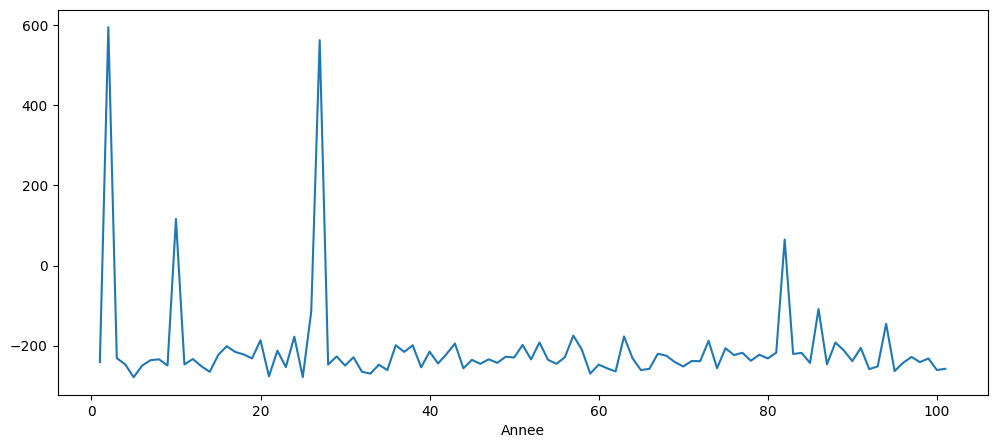

In [113]:
# lance 1000 ans de tirage loto  et affiche un graphique des gain
data_loto =  tirages_loto(joueur,100)
data_loto.groupby("Annee")["Gain"].sum().plot(figsize=[12,5]);

In [114]:
#top 10 des plus gros gros gains
data_loto.nlargest(20,"Gain").nlargest(30,"Gain")

,Gain,Gain_cumuler,Depense_cumuler,Semaine,Numeros_joueur,Etoile_joueur,Numero_gagnant,Etoile_gagnante,Win
Annee,,,,,,,,,
2,814.8,549.6,365.2,56,"{33, 2, 9, 43, 24}",{5},"{33, 2, 9, 46, 24}",{5},True
27,814.8,-4077.0,8811.0,1335,"{33, 2, 9, 43, 24}",{5},"{33, 2, 43, 24, 29}",{5},True
10,332.8,-1090.1,3115.2,472,"{33, 2, 9, 43, 24}",{5},"{33, 2, 8, 43, 24}",{1},True
82,332.8,-16509.3,27313.0,4139,"{33, 2, 9, 43, 24}",{5},"{33, 9, 43, 24, 27}",{1},True
63,47.8,-12575.9,21082.6,3195,"{33, 2, 9, 43, 24}",{5},"{9, 43, 18, 20, 24}",{5},True
94,47.8,-19135.3,31431.4,4763,"{33, 2, 9, 43, 24}",{5},"{9, 43, 17, 24, 30}",{5},True
86,47.8,-17528.3,28870.6,4375,"{33, 2, 9, 43, 24}",{5},"{33, 2, 1, 9, 31}",{5},True
86,47.8,-17489.3,28881.6,4376,"{33, 2, 9, 43, 24}",{5},"{33, 2, 43, 18, 22}",{5},True
57,47.8,-11176.0,19140.0,2900,"{33, 2, 9, 43, 24}",{5},"{33, 9, 43, 45, 14}",{5},True
